In [128]:
import os
import pandas as pd

def combine_csvs_with_labels(base_dir, output_file):
    """
    Combines all CSV files in subfolders of 'base_dir' into a single CSV.
    Extracts the label from the folder name, which is the suffix after the last dash.

    Parameters:
    - base_dir: Path to the main directory (e.g., 'Dataset').
    - output_file: Path to the output combined CSV file.
    """
    combined_data = []  # List to store data from all CSV files
    
    # Traverse through all subdirectories and files
    for root, dirs, files in os.walk(base_dir):
        for file in files:
            if file.endswith('.csv'):  # Process only CSV files
                # Extract the label from the folder name
                folder_name = os.path.basename(root)
                label = folder_name.split('-')[-1]  # Get the suffix as the label
                
                # Full path to the current CSV file
                csv_path = os.path.join(root, file)
                
                # Read the CSV file
                try:
                    df = pd.read_csv(csv_path)
                    df['label'] = label  # Add a new column for the label
                    combined_data.append(df)
                except Exception as e:
                    print(f"Error reading {csv_path}: {e}")
                    continue
    
    # Combine all the data into a single DataFrame
    if combined_data:
        combined_df = pd.concat(combined_data, ignore_index=True)
        # Save the combined DataFrame to the output file
        combined_df.to_csv(output_file, index=False)
        print(f"All data combined and saved to: {output_file}")
    else:
        print("No CSV files found or processed.")

# Define your paths here
base_dataset_dir = "Dataset"  # Replace with the path to your 'Dataset' folder
output_csv_file = "ProcessedDataset/combined_data.csv"  # Replace with desired output path

# Ensure the output directory exists
os.makedirs(os.path.dirname(output_csv_file), exist_ok=True)

# Run the function
combine_csvs_with_labels(base_dataset_dir, output_csv_file)


All data combined and saved to: ProcessedDataset/combined_data.csv


In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix

In [130]:
df = pd.read_csv('ProcessedDataset/combined_data.csv')

In [131]:
df.head()

,TimeStamp,Delta_TP9,Delta_AF7,Delta_AF8,Delta_TP10,Theta_TP9,Theta_AF7,Theta_AF8,Theta_TP10,Alpha_TP9,...,Gyro_Y,Gyro_Z,HeadBandOn,HSI_TP9,HSI_AF7,HSI_AF8,HSI_TP10,Battery,Elements,label
0,2024-11-14 12:09:23.832,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,/muse/event/connected Muse-C431,Resting
1,2024-11-14 12:09:24.833,0.680634,0.0,0.0,0.352584,0.655136,0.0,0.0,0.704461,1.508479,...,-5.435638,-0.097198,1.0,1.0,4.0,1.0,1.0,35.0,NaN,Resting
2,2024-11-14 12:09:25.833,0.356767,0.0,0.0,0.177184,0.721911,0.0,0.0,0.638689,1.473120,...,-5.308533,0.134583,1.0,1.0,4.0,1.0,1.0,35.0,NaN,Resting
3,2024-11-14 12:09:26.837,0.566941,0.0,0.0,0.272231,0.370174,0.0,0.0,0.475671,1.006649,...,-5.540314,-0.373840,1.0,1.0,2.0,1.0,1.0,35.0,NaN,Resting
4,2024-11-14 12:09:27.836,0.385465,0.0,0.0,0.293424,0.245446,0.0,0.0,0.292283,1.156194,...,-5.024414,0.186920,1.0,1.0,2.0,1.0,1.0,35.0,NaN,Resting


In [132]:
df.drop(columns=['TimeStamp','AUX_RIGHT','Accelerometer_X','Accelerometer_Y','Accelerometer_Z',
                      'Gyro_X','Gyro_Y','Gyro_Z','HeadBandOn','Battery','Elements'], inplace=True)

In [133]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 704 entries, 0 to 703
Data columns (total 29 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Delta_TP9   371 non-null    float64
 1   Delta_AF7   371 non-null    float64
 2   Delta_AF8   371 non-null    float64
 3   Delta_TP10  371 non-null    float64
 4   Theta_TP9   371 non-null    float64
 5   Theta_AF7   371 non-null    float64
 6   Theta_AF8   371 non-null    float64
 7   Theta_TP10  371 non-null    float64
 8   Alpha_TP9   371 non-null    float64
 9   Alpha_AF7   371 non-null    float64
 10  Alpha_AF8   371 non-null    float64
 11  Alpha_TP10  371 non-null    float64
 12  Beta_TP9    371 non-null    float64
 13  Beta_AF7    371 non-null    float64
 14  Beta_AF8    371 non-null    float64
 15  Beta_TP10   371 non-null    float64
 16  Gamma_TP9   371 non-null    float64
 17  Gamma_AF7   371 non-null    float64
 18  Gamma_AF8   371 non-null    float64
 19  Gamma_TP10  371 non-null    f

In [134]:
# Replace NaN values with 0
df= df.fillna(0)

In [135]:
df = df[~df.eq(0).any(axis=1)]

# Classify in all  4 outputs

In [136]:
# Separate inputs and outputs
X = df.iloc[:, :-1]  # All columns except the last one
y = df.iloc[:, -1]  # Only the last column

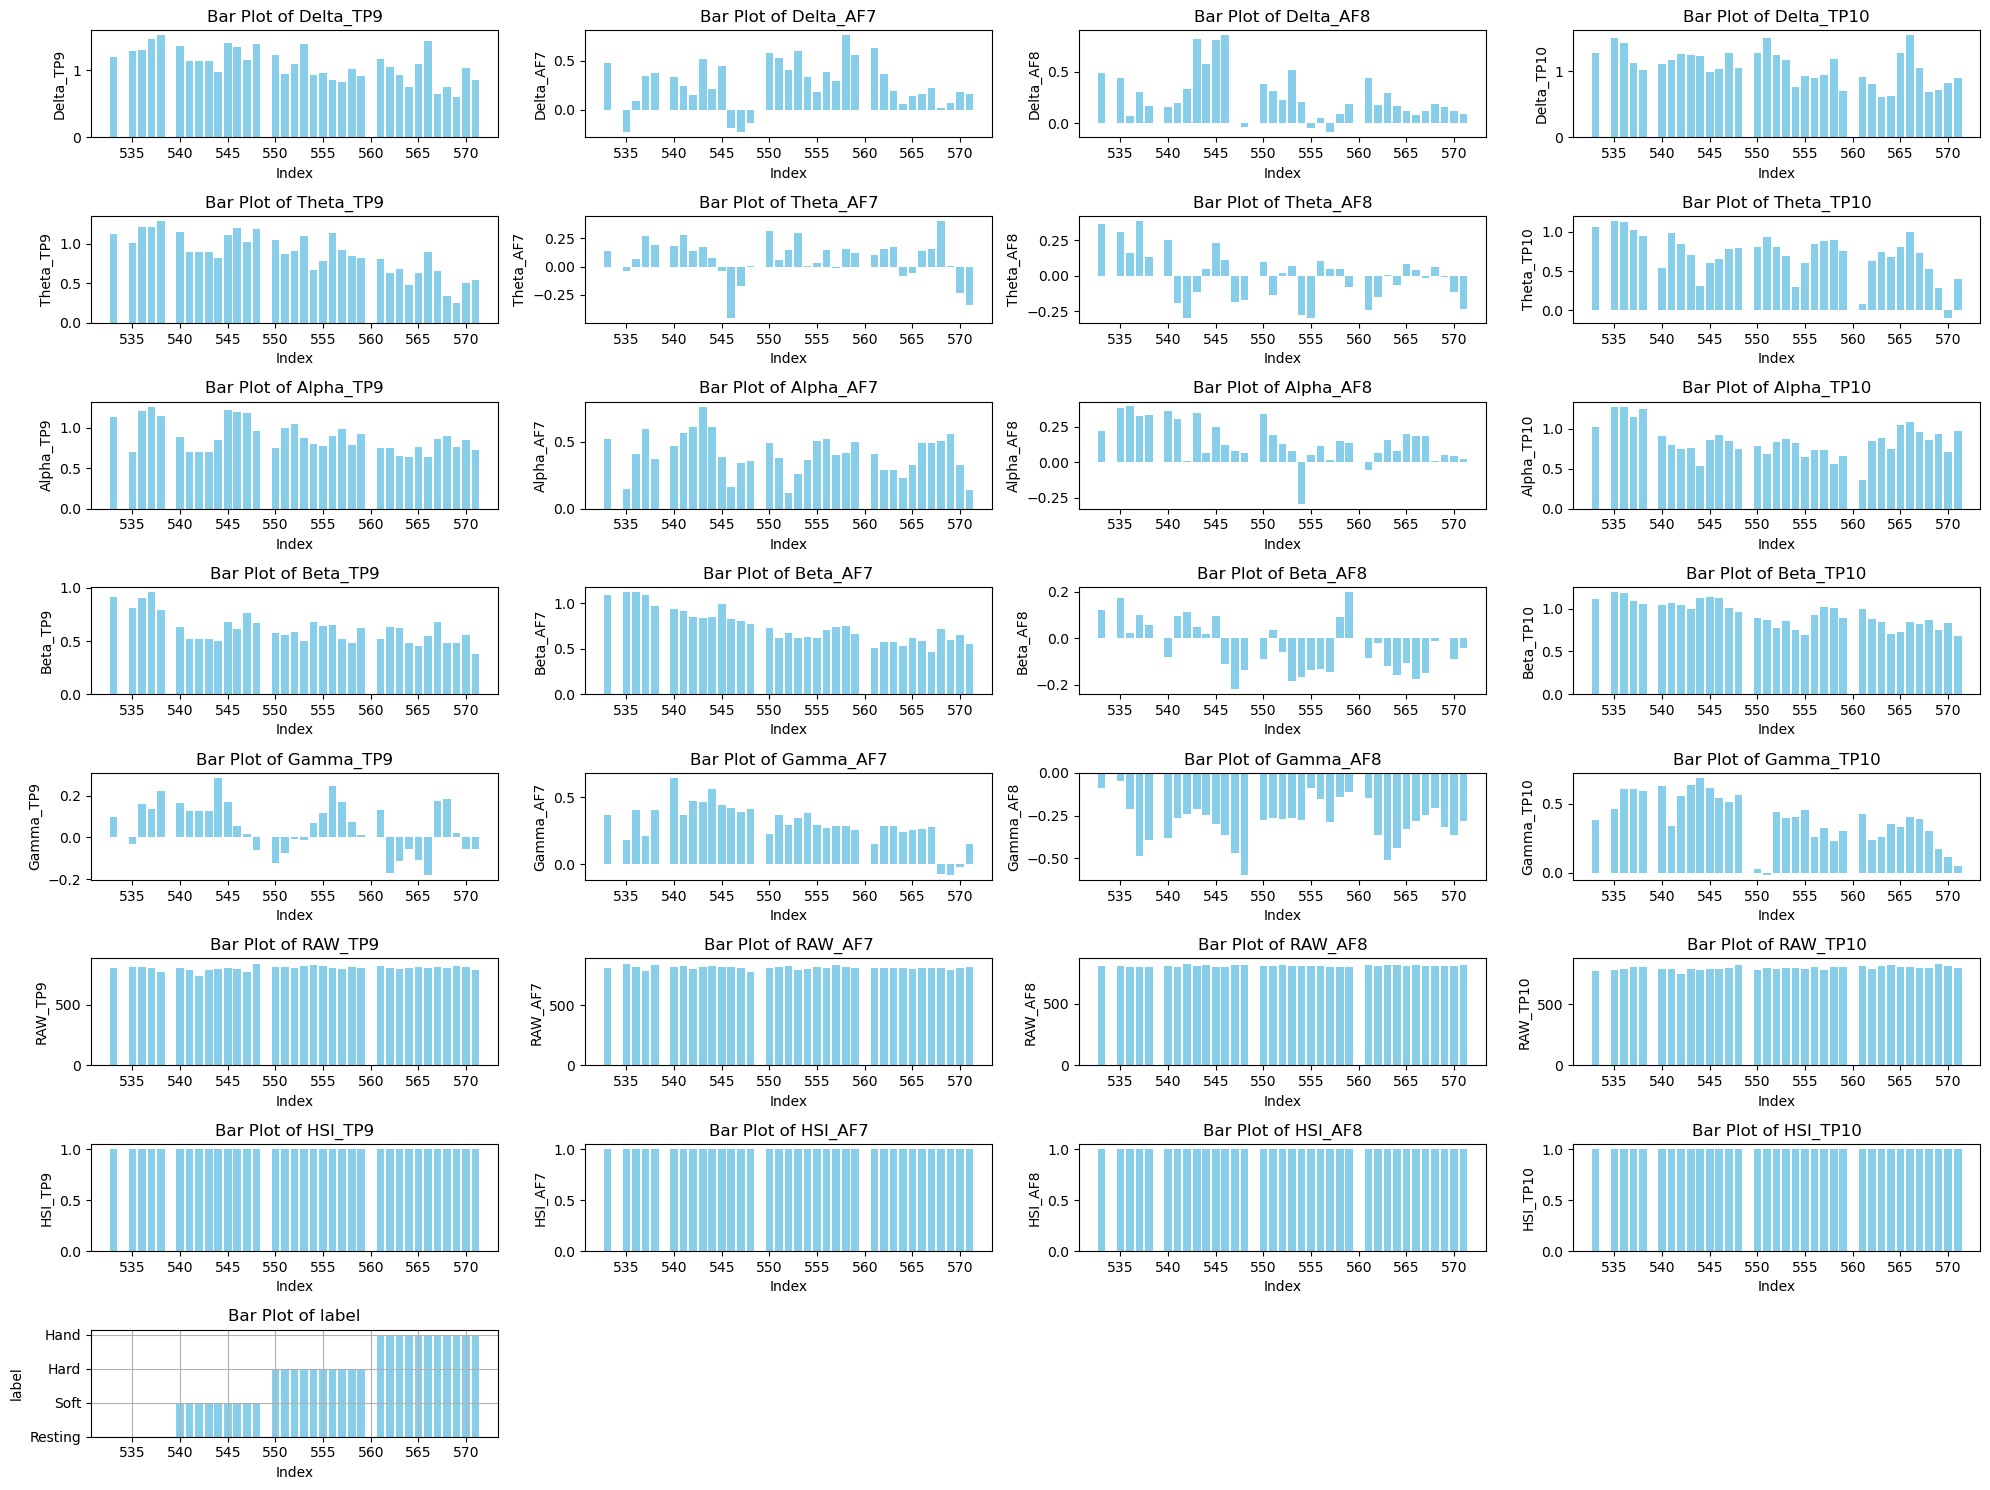

In [137]:
# Visualize inputimport pandas as pd
import matplotlib.pyplot as plt

# Assuming 'df' is your DataFrame
def plot_bar_plots_grid(df, rows=7, cols=4):
    """
    Plots bar plots for each column in the DataFrame in a grid layout (7 rows x 4 columns).

    Parameters:
    - df: Pandas DataFrame containing the data.
    - rows: Number of rows in the grid (default 7).
    - cols: Number of columns in the grid (default 4).
    """
    total_plots = len(df.columns)
    
    # Calculate grid size based on total number of columns
    fig, axes = plt.subplots(rows, cols, figsize=(20, 15))  # Adjust figure size as needed
    
    # Flatten the axes array for easier indexing
    axes = axes.flatten()

    for i, column in enumerate(df.columns):
        ax = axes[i]
        ax.bar(df.index, df[column], color='skyblue')
        ax.set_xlabel("Index", fontsize=10)
        ax.set_ylabel(column, fontsize=10)
        ax.set_title(f"Bar Plot of {column}", fontsize=12)
    
    # If there are fewer plots than subplots, remove any extra axes
    if total_plots < len(axes):
        for j in range(total_plots, len(axes)):
            fig.delaxes(axes[j])

    # Display the plot
    plt.tight_layout()  # Adjust layout for better spacing
    plt.grid(True)
    plt.show()

plot_bar_plots_grid(df, 8, 4)


In [138]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_encoded = le.fit_transform(y)

# Display the mapping of the original labels to their numerical values
label_mapping = dict(zip(le.classes_, range(len(le.classes_))))
print("Label Mapping: ", label_mapping)

Label Mapping:  {'Hand': 0, 'Hard': 1, 'Resting': 2, 'Soft': 3}


In [139]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X = sc.fit_transform(X)

In [140]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y_encoded, test_size = 0.2, random_state = 34)

In [141]:
from sklearn.neighbors import KNeighborsClassifier

for i in range(1,6):
    KNNclassifier = KNeighborsClassifier(n_neighbors = i, metric = 'minkowski', p = 2)
    KNNclassifier.fit(x_train, y_train)

    y_pred = KNNclassifier.predict(x_train)
    KNN_train_accuracy = accuracy_score(y_train, y_pred)
    print("Accuracy on the training set:", KNN_train_accuracy, "with", i, "neighbor(s).")

KNNclassifier = KNeighborsClassifier(n_neighbors = 1, metric = 'minkowski', p = 2)
KNNclassifier.fit(x_train, y_train)

y_pred = KNNclassifier.predict(x_train)
KNN_train_accuracy = accuracy_score(y_train, y_pred)
print("Accuracy on the training set:", KNN_train_accuracy, "with", 1, "neighbor.")

Accuracy on the training set: 1.0 with 1 neighbor(s).
Accuracy on the training set: 0.8214285714285714 with 2 neighbor(s).
Accuracy on the training set: 0.9285714285714286 with 3 neighbor(s).
Accuracy on the training set: 0.8928571428571429 with 4 neighbor(s).
Accuracy on the training set: 0.8571428571428571 with 5 neighbor(s).
Accuracy on the training set: 1.0 with 1 neighbor.


In [142]:
from sklearn.svm import SVC
SVMclassifier = SVC(kernel = 'rbf', random_state = 42)
SVMclassifier.fit(x_train, y_train)
y_pred = SVMclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
SVM_train_accuracy = accuracy_score(y_test, y_pred)
print("SVM accuracy is", SVM_train_accuracy*100, "%")

[[1 1 0 0]
 [0 2 0 0]
 [0 0 0 1]
 [0 0 0 2]]
SVM accuracy is 71.42857142857143 %


In [143]:
from sklearn.ensemble import RandomForestClassifier

Forestclassifier = RandomForestClassifier(n_estimators = 10, criterion = 'entropy', random_state = 0)
Forestclassifier.fit(x_train, y_train)
y_pred = Forestclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
RandomTree_train_accuracy = accuracy_score(y_test, y_pred)
print("Random Forest accuracy is", RandomTree_train_accuracy*100, "%")

[[2 0 0 0]
 [2 0 0 0]
 [0 0 1 0]
 [0 0 0 2]]
Random Forest accuracy is 71.42857142857143 %


In [144]:
import xgboost as xgb
from xgboost import XGBClassifier
# Initialize and train the XGBoost classifier
xg_classifier = xgb.XGBClassifier(objective ='multi:softmax', num_class=3, random_state=42)
xg_classifier.fit(x_train, y_train)
cm = confusion_matrix(y_test, y_pred)
print(cm)
XgB_train_accuracy = accuracy_score(y_test, y_pred)
print("XgBoost accuracy is", XgB_train_accuracy*100, "%")


[[2 0 0 0]
 [2 0 0 0]
 [0 0 1 0]
 [0 0 0 2]]
XgBoost accuracy is 71.42857142857143 %


In [145]:
from sklearn.linear_model import LogisticRegression# Initialize the classifiersf
Logisticclassifier = LogisticRegression()
Logisticclassifier.fit(x_train, y_train)
y_pred = Logisticclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
Logistic_train_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy is", Logistic_train_accuracy*100, "%")

[[2 0 0 0]
 [1 1 0 0]
 [0 0 1 0]
 [0 0 0 2]]
Decision Tree accuracy is 85.71428571428571 %


In [146]:
from sklearn.naive_bayes import GaussianNB
NBclassifier = GaussianNB()
NBclassifier.fit(x_train, y_train)
y_pred = NBclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
NB_train_accuracy = accuracy_score(y_test, y_pred)
print("NB accuracy is", NB_train_accuracy*100, "%")

[[2 0 0 0]
 [0 2 0 0]
 [0 0 0 1]
 [0 0 0 2]]
NB accuracy is 85.71428571428571 %


In [147]:
from sklearn.tree import DecisionTreeClassifier
Treeclassifier = DecisionTreeClassifier(criterion = 'entropy', random_state = 0)
Treeclassifier.fit(x_train, y_train)
y_pred = Treeclassifier.predict(x_test)
cm = confusion_matrix(y_test, y_pred)
print(cm)
DecisionTree_train_accuracy = accuracy_score(y_test, y_pred)
print("Decision Tree accuracy is", DecisionTree_train_accuracy*100, "%")

[[1 1 0 0]
 [0 2 0 0]
 [0 0 1 0]
 [0 0 0 2]]
Decision Tree accuracy is 85.71428571428571 %


Train Accuracy for KNNclassifier: 100.0%
Train Accuracy for SVMclassifier: 100.0%
Train Accuracy for Forestclassifier: 100.0%
Train Accuracy for xg_classifier: 100.0%
Train Accuracy for Logisticclassifier: 100.0%
Train Accuracy for NBclassifier: 100.0%
Train Accuracy for Treeclassifier: 100.0%


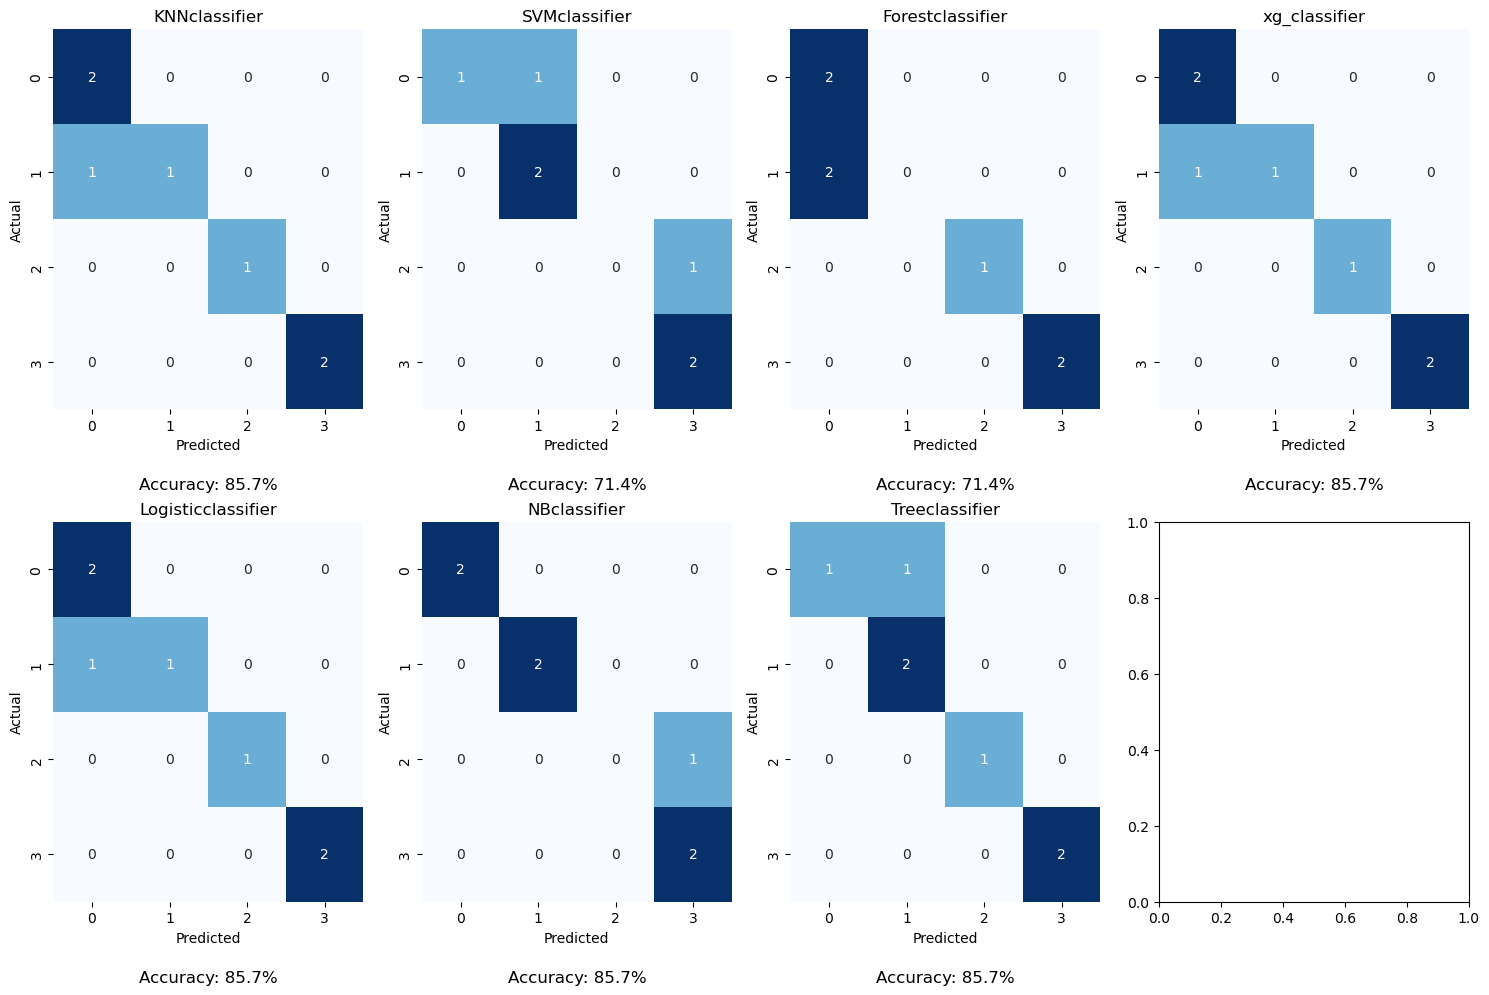

In [151]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, confusion_matrix

# Function to plot a confusion matrix and display accuracy
def plot_confusion_matrix(ax, y_true, y_pred, title, accuracy):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, ax=ax)
    ax.set_xlabel('Predicted')
    ax.set_ylabel('Actual')
    ax.set_title(title)

    # Add the accuracy text annotation at the bottom of the plot
    ax.text(0.5, -0.2, f"Accuracy: {accuracy:.1f}%", fontsize=12, va='center', ha='center', 
            transform=ax.transAxes)

Model_list = {
    "KNNclassifier": KNNclassifier,
    "SVMclassifier": SVMclassifier,
    "Forestclassifier": Forestclassifier,  # Assuming you have this variable defined
    "xg_classifier": xg_classifier,        # Assuming you have this variable defined
    "Logisticclassifier": Logisticclassifier,
    "NBclassifier": NBclassifier,
    "Treeclassifier": Treeclassifier
}

# Create a grid of subplots with the appropriate number of rows and columns
rows, cols = 2, 4  # Adjust this depending on the number of models
fig, axes = plt.subplots(rows, cols, figsize=(15, 10))

# Flatten the axes array for easier indexing
axes = axes.flatten()

for i, (name, model) in enumerate(Model_list.items()):
    # Ensure you're calling the model's predict method
    y_pred = model.predict(x_test)
    x_pred = model.predict(x_train)
    accuracy = accuracy_score(y_test, y_pred) * 100  # Multiply by 100 to convert to percentage
    train_accuracy = accuracy_score(y_train, x_pred) * 100
    print(f"Train Accuracy for {name}: {train_accuracy:.1f}%")
    
    # Plot the confusion matrix in the respective subplot and display accuracy
    plot_confusion_matrix(axes[i], y_test, y_pred, name, accuracy)

# Adjust layout to prevent overlapping subplots
plt.tight_layout()
plt.show()


# Normalize brains using resting position